In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import f_classif,f_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

from sklearn.model_selection import train_test_split

/Users/shri/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/shri/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 1. Classification Feature Selection

In [9]:
# Load the pribas dataset from the Kaggle
data=pd.read_csv('datasets/paribas.csv')
data.shape

(114321, 133)

In [3]:
# Knowing the data
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [40]:
# Total Categorical cols
len(list(data.columns))

# Count total entries for unique values
data.groupby('v125')['ID'].nunique()

data.select_dtypes(include='O').columns

Index(['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71',
       'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'],
      dtype='object')

In [41]:
# In practise, feature selection should be done after data preprocesssing,
# so ideally, all the categorical variables should be encoded into numbers
# and then you can assess how deterministic they are of the target

# here for simplicity we'll use numerical variables
numerics=['int16','int32','int64','float16','float32','float64']
numerical_var=data.select_dtypes(include=numerics).columns
data=data[numerical_var]
data.shape

(114321, 114)

In [42]:
# Seperate the dataset into training and testing so as to avoid Overfitting.
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['target','ID'],axis=1),
                                              data['target'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((80024, 112), (34297, 112))

In [48]:
# Calculate the univariate statistical measure between 
# each variable and the target
# similarly to chi2, the output is the array of f-scores at index 0,
# and an array of p_values at index 1
univariate=f_classif(x_train.fillna(0),y_train)
univariate

(array([3.28943248e+01, 1.24509507e-01, 3.56791176e-04, 1.83925180e+01,
        7.70770317e+00, 8.51319945e+00, 2.58136886e+01, 3.66712075e+01,
        1.84987057e+03, 2.94115021e+01, 2.22103957e+02, 5.35072430e+01,
        1.40316020e+03, 6.71307533e+01, 2.99677161e+01, 4.72435469e+00,
        1.25309066e+01, 3.23780703e+01, 2.41975733e+01, 2.04523731e+02,
        6.97374959e+01, 1.86699385e+01, 5.43386252e+00, 7.79938651e+00,
        4.19582385e+01, 1.65746655e+01, 6.43577083e+01, 1.09781643e+02,
        7.17092018e+02, 2.82344426e+01, 7.75847300e+01, 5.74486104e+01,
        3.04247033e+02, 5.34881327e+00, 7.60912403e+01, 2.35795902e+01,
        3.05437914e+01, 6.83854785e+00, 5.16016558e+00, 5.18855982e+01,
        2.22602977e+01, 7.66466957e+01, 3.03384821e+01, 5.03565588e+03,
        1.09750749e+02, 2.99367125e+01, 1.22279689e+01, 1.14345375e+02,
        1.66146173e+01, 8.88998669e+01, 1.00008514e+01, 3.35814398e+00,
        9.82628852e+00, 7.15712510e+02, 2.34692647e+01, 1.744873

In [49]:
# Let's add the varaible name against the respective p_values
univariate=pd.Series(univariate[1])
univariate.index=x_train.columns
univariate.sort_values(ascending=False)

v4       9.849298e-01
v93      9.280838e-01
v128     8.840751e-01
v131     7.466121e-01
v2       7.241950e-01
v101     6.356854e-01
v100     5.017337e-01
v106     4.340930e-01
v99      3.893944e-01
v108     3.208601e-01
v64      1.865263e-01
v82      1.551261e-01
v88      9.055518e-02
v60      6.687711e-02
v17      2.974126e-02
v102     2.581477e-02
v109     2.312316e-02
v44      2.311334e-02
v39      2.073890e-02
v26      1.975242e-02
v87      1.225684e-02
v76      9.650528e-03
v43      8.922806e-03
v6       5.499844e-03
v27      5.227638e-03
v7       3.526777e-03
v127     2.407669e-03
v116     2.241343e-03
v61      1.720973e-03
v59      1.565263e-03
            ...      
v15      2.577917e-16
v23      6.881230e-17
v73      2.268300e-17
v40      2.759272e-18
v48      2.083315e-18
v36      1.296239e-18
v81      6.518513e-20
v58      4.259207e-21
v84      3.908453e-22
v111     1.206336e-22
v51      1.154563e-25
v33      1.136732e-25
v83      2.076381e-26
v121     1.841249e-26
v55      1

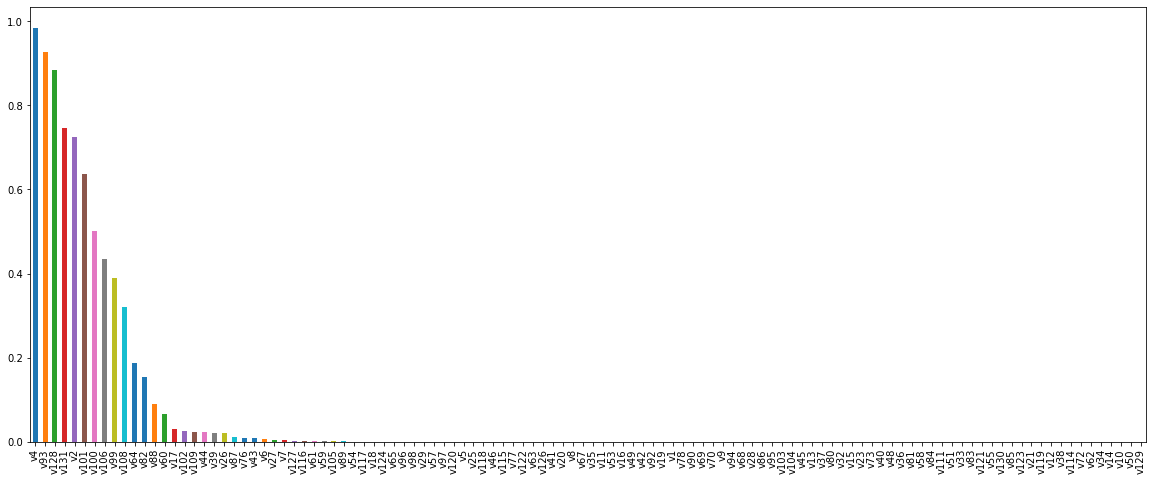

In [50]:
univariate.sort_values(ascending=False,inplace=True).plot.bar(figsize=(20,8))

Remember that the lower the p_value more predictable the feature is to the principle. There are few features on the left that do not seem to have predictive power according to this test. Thus, we'll assume that variables with p_values greater than 0.05(5%) are indeed not important for us.

Similarly as in case of chi2, if the data set is large, it is not unusual to have small pvalues. This doesnot say much about the relevance of the feature. Mostly it indicates that the dataset is big.

Once again, where we put cut-off to select features is a bit arbitrary. One way is to select the top 10,20 features. Alternatively, the top 10th percentile. This can be achieved by using either `SelectKBest` OR `SelectPercentile`

In [52]:
# Here we'll select the top 10 featuer
sel_=SelectKBest(f_classif,k=10).fit(x_train.fillna(0),y_train)

# Features that can be used for modelling
x_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v34', 'v38', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')

In [54]:
x_train=sel_.transform(x_train.fillna(0))
x_train.shape

(80024, 10)

In [77]:
x_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7.0,2034.0,2.0,645.0
1,6.0,1291.0,2.0,431.0
2,5.0,858.0,0.0,0.0
3,6.0,1258.0,1.0,280.0
4,2.0,438.0,1.0,246.0


### 2. Regression Feature Selection 

In [78]:
# We'll use the housepriceprediction dataset from kaggle
data=pd.read_csv('datasets/houseprice.csv')
data.shape

(1460, 81)

In [79]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
# Convert Categorical values into numerical using encoding
# and then use them for further processes.

# For simplicity we'll use only numerical cols now
numerical_vals=data.select_dtypes(include=numerics).columns
data=data[numerical_vals]
data.shape

(1460, 38)

In [81]:
# Now split the data like we did above
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['SalePrice','Id'],axis=1),
                                              data['SalePrice'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((1022, 36), (438, 36))

In [82]:
# Performing statistical test for regression
univariate=f_regression(x_train.fillna(0),y_train)
univariate

(array([6.73682615e+00, 3.94145023e+01, 7.33363614e+01, 1.62857050e+03,
        1.38505790e+00, 3.65097556e+02, 3.62663803e+02, 3.04197009e+02,
        1.93160129e+02, 2.64166379e-01, 4.33623731e+01, 6.54341155e+02,
        6.05576313e+02, 1.28758896e+02, 4.21311432e-02, 1.13187965e+03,
        5.98878339e+01, 3.74697166e-01, 4.97954582e+02, 8.65303218e+01,
        3.89632778e+01, 1.92381821e+01, 4.31845019e+02, 2.93787921e+02,
        7.95849269e+01, 7.58024880e+02, 7.27175552e+02, 1.02368716e+02,
        1.09493897e+02, 1.42760011e+01, 3.52022335e+00, 9.59825179e+00,
        1.22112072e+00, 7.33481415e-01, 2.11044803e+00, 2.78001568e+00]),
 array([9.57991693e-003, 5.06213650e-010, 3.98274527e-017, 1.42257159e-213,
        2.39516038e-001, 8.26023733e-070, 2.03038106e-069, 8.04969151e-060,
        2.41079365e-040, 6.07383462e-001, 7.26891935e-011, 6.70757414e-112,
        2.41864868e-105, 3.45788546e-028, 8.37410946e-001, 1.53312942e-167,
        2.40752943e-014, 5.40591400e-001, 3.82

In [83]:
univariate=pd.Series(univariate[1])
univariate.index=x_train.columns
univariate

MSSubClass        9.579917e-03
LotFrontage       5.062137e-10
LotArea           3.982745e-17
OverallQual      1.422572e-213
OverallCond       2.395160e-01
YearBuilt         8.260237e-70
YearRemodAdd      2.030381e-69
MasVnrArea        8.049692e-60
BsmtFinSF1        2.410794e-40
BsmtFinSF2        6.073835e-01
BsmtUnfSF         7.268919e-11
TotalBsmtSF      6.707574e-112
1stFlrSF         2.418649e-105
2ndFlrSF          3.457885e-28
LowQualFinSF      8.374109e-01
GrLivArea        1.533129e-167
BsmtFullBath      2.407529e-14
BsmtHalfBath      5.405914e-01
FullBath          3.826600e-90
HalfBath          8.144289e-20
BedroomAbvGr      6.323899e-10
KitchenAbvGr      1.273591e-05
TotRmsAbvGrd      2.928110e-80
Fireplaces        4.565821e-58
GarageYrBlt       2.098253e-18
GarageCars       3.161427e-125
GarageArea       2.408454e-121
WoodDeckSF        5.374493e-23
OpenPorchSF       2.068771e-24
EnclosedPorch     1.670052e-04
3SsnPorch         6.090965e-02
ScreenPorch       2.000916e-03
PoolArea

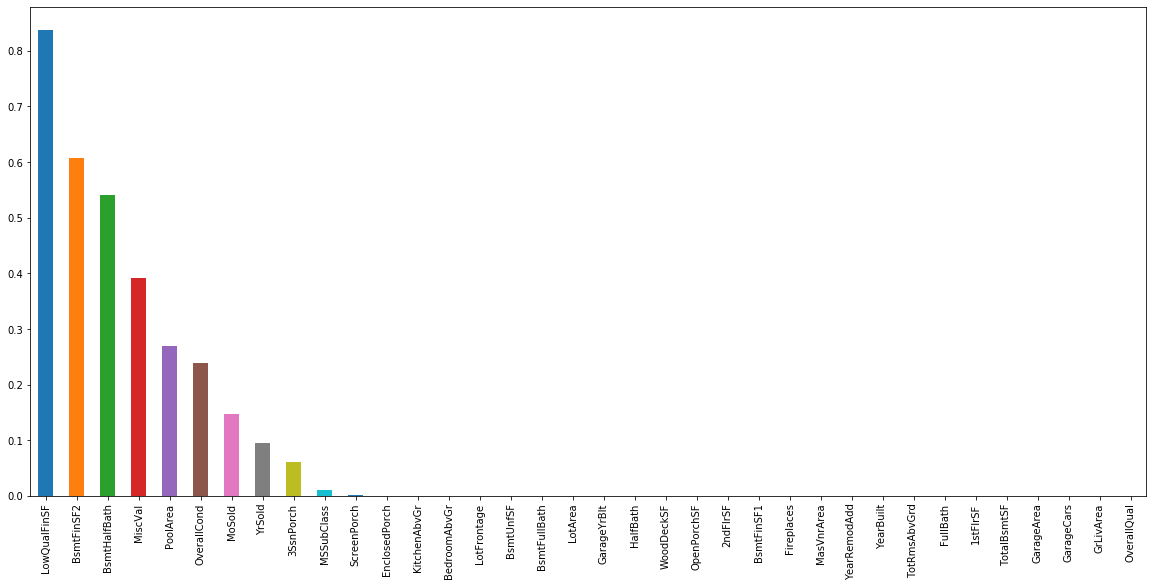

In [84]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,9))

In [85]:
# All important features with pvalue<0.05
univariate[univariate<0.05]

MSSubClass        9.579917e-03
LotFrontage       5.062137e-10
LotArea           3.982745e-17
OverallQual      1.422572e-213
YearBuilt         8.260237e-70
YearRemodAdd      2.030381e-69
MasVnrArea        8.049692e-60
BsmtFinSF1        2.410794e-40
BsmtUnfSF         7.268919e-11
TotalBsmtSF      6.707574e-112
1stFlrSF         2.418649e-105
2ndFlrSF          3.457885e-28
GrLivArea        1.533129e-167
BsmtFullBath      2.407529e-14
FullBath          3.826600e-90
HalfBath          8.144289e-20
BedroomAbvGr      6.323899e-10
KitchenAbvGr      1.273591e-05
TotRmsAbvGrd      2.928110e-80
Fireplaces        4.565821e-58
GarageYrBlt       2.098253e-18
GarageCars       3.161427e-125
GarageArea       2.408454e-121
WoodDeckSF        5.374493e-23
OpenPorchSF       2.068771e-24
EnclosedPorch     1.670052e-04
ScreenPorch       2.000916e-03
dtype: float64

In [86]:
# We'll use Percentile method here to select top 10 percentile entries
sel_=SelectPercentile(f_regression,percentile=10).fit(x_train.fillna(0),y_train)
x_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [88]:
x_train=sel_.transform(x_train.fillna(0))
x_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [74]:
x_train=pd.DataFrame(x_train)

In [75]:
x_train.columns=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [76]:
x_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7.0,2034.0,2.0,645.0
1,6.0,1291.0,2.0,431.0
2,5.0,858.0,0.0,0.0
3,6.0,1258.0,1.0,280.0
4,2.0,438.0,1.0,246.0
